In [1]:
import torch
import torch.nn as nn
import torchvision 
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size=784
hidden_size=100
num_classes=10
num_epochs=10
batch_size=100
learning_rate=0.001

train_dataset=torchvision.datasets.MNIST(root='./data',train=True,
                                         transform=transforms.ToTensor(),download=True)

test_dataset=torchvision.datasets.MNIST(root='./data',train=False,
                                         transform=transforms.ToTensor())

train_loader=torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size,shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [9]:
examples=iter(train_loader)
samples,lables=examples.next()
print(samples.shape)

torch.Size([100, 1, 28, 28])


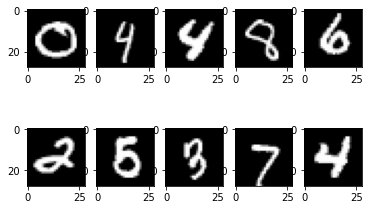

In [10]:
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(samples[i][0],cmap='gray')
plt.show()

In [12]:
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet,self).__init__()
    self.l1=nn.Linear(input_size,hidden_size)
    self.relu=nn.ReLU()
    self.l2=nn.Linear(hidden_size,num_classes)

  def forward(self,x):
    out=self.l1(x)
    out=self.relu(out)
    out=self.l2(out)
    return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)
critertion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [13]:
n_total_steps=len(train_loader)
for epoch in range(num_epochs):
  for i, (images,labels) in enumerate(train_loader):
    images=images.reshape(-1,28*28).to(device)
    labels=labels.to(device)

    #forward
    outputs=model(images)
    loss=critertion(outputs,labels)

    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1)%100==0:
      print(f'epoch{epoch+1}/{num_epochs},step{i+1}/{n_total_steps},loss={loss.item():.4f}')

epoch1/10,step100/600,loss=0.3447
epoch1/10,step200/600,loss=0.2057
epoch1/10,step300/600,loss=0.3259
epoch1/10,step400/600,loss=0.3491
epoch1/10,step500/600,loss=0.3174
epoch1/10,step600/600,loss=0.1836
epoch2/10,step100/600,loss=0.2180
epoch2/10,step200/600,loss=0.3459
epoch2/10,step300/600,loss=0.1768
epoch2/10,step400/600,loss=0.2662
epoch2/10,step500/600,loss=0.1161
epoch2/10,step600/600,loss=0.1311
epoch3/10,step100/600,loss=0.1336
epoch3/10,step200/600,loss=0.1051
epoch3/10,step300/600,loss=0.3104
epoch3/10,step400/600,loss=0.1068
epoch3/10,step500/600,loss=0.1640
epoch3/10,step600/600,loss=0.0754
epoch4/10,step100/600,loss=0.1534
epoch4/10,step200/600,loss=0.0783
epoch4/10,step300/600,loss=0.0465
epoch4/10,step400/600,loss=0.0627
epoch4/10,step500/600,loss=0.0492
epoch4/10,step600/600,loss=0.1514
epoch5/10,step100/600,loss=0.1105
epoch5/10,step200/600,loss=0.1022
epoch5/10,step300/600,loss=0.0984
epoch5/10,step400/600,loss=0.0616
epoch5/10,step500/600,loss=0.1061
epoch5/10,step

In [14]:
with torch.no_grad():
  n_correct=0
  n_samples=0
  for images, labels in test_loader:
    images=images.reshape(-1,28*28).to(device)
    labels=labels.to(device)
    outputs=model(images)

    _,predictions=torch.max(outputs,1)
    n_samples+=labels.shape[0]
    n_correct+=(predictions==labels).sum().item()

  acc=100.0*n_correct/n_samples
  print(f'accuracy={acc}')

accuracy=99.11666666666666
